In [1]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
c = nn.CrossEntropyLoss()
output = Variable(torch.FloatTensor([0,0,0,1])).view(1, -1)
target = Variable(torch.LongTensor([2]))
c(output, target)

tensor(1.7437)

In [ ]:
##　テキストを読み込み
import tqdm
import glob
import os
import word2vec
import collections
import mylib
import operator 
import itertools
#印象語の読み込み
sortsecond=lambda a : os.path.splitext(os.path.basename(a))[0]
tag_files = sorted(glob.glob('./Myfont/dataset/taglabel/*'))
taglabel={}
#単語埋め込みモデルの定義
Embedding_model=word2vec.word2vec()
for i,t_f in tqdm.tqdm(enumerate(tag_files)):
    with open(t_f, 'r', encoding='utf-8') as f:
        text=f.read()
        Font_name=os.path.basename(t_f)
        tag=mylib.label_preprocess(text)
        tag_list=[]
        taglabel[Font_name]=tag
a=list(itertools.chain.from_iterable(list(taglabel.values())))
b=collections.Counter(a)
vocab_list=sorted(b.items(),key=lambda x:x[1],reverse=True)
vocab_dict=dict(sorted(b.items(),key=lambda x:x[1],reverse=True))
def check_coverage(vocab, embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm.tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x
oov = check_coverage(vocab_dict, Embedding_model)

In [2]:
oov

[('hand_drawn', 1223),
 ('handletter', 908),
 ('all_caps', 877),
 ('grotesk', 757),
 ('1930s', 753),
 ('small_caps', 671),
 ('opentype', 643),
 ('1950s', 619),
 ('1800s', 605),
 ('1960s', 585),
 ('1920s', 559),
 ('capital_sharp_s', 551),
 ('wood_type', 551),
 ('versal_eszett', 542),
 ('sanserif', 528),
 ('1940s', 509),
 ('blackletter', 508),
 ('1970s', 473),
 ('brush_drawn', 425),
 ('sign_painting', 416),
 ('oldstyle', 399),
 ('caps_only', 398),
 ('1900s', 388),
 ('wild_west', 321),
 ('1990s', 300),
 ('1980s', 293),
 ('high_contrast', 291),
 ('webfont', 291),
 ('didone', 288),
 ('true_italics', 282),
 ('non_alphabetic', 274),
 ('unicase', 258),
 ('web_graphics', 249),
 ('bauhaus', 235),
 ('garalde', 226),
 ('book_text', 215),
 ('comic_text', 206),
 ('book_cover', 198),
 ('monospace', 193),
 ('old_style_numerals', 189),
 ('upright_script', 187),
 ('old_style', 184),
 ('news_headline', 183),
 ('2000s', 179),
 ('video_game', 168),
 ('brush_script', 158),
 ('contextual_alternates', 158),
 

In [3]:
Embedding_model["san_serif"]

array([ 1.91650391e-02,  7.20214844e-03, -1.90734863e-03,  5.12695312e-02,
        1.64794922e-02,  5.15747070e-03,  5.27343750e-02, -4.00390625e-02,
       -1.92871094e-02,  6.34765625e-02, -1.90429688e-02, -1.81579590e-03,
       -2.09960938e-02, -2.07519531e-03,  5.18798828e-03,  3.19824219e-02,
       -8.97216797e-03,  8.49609375e-02, -5.37109375e-02, -1.21582031e-01,
       -5.61523438e-02,  8.05664062e-02, -2.44140625e-02,  1.27563477e-02,
       -9.37500000e-02,  5.21850586e-03, -8.36181641e-03,  1.25000000e-01,
        2.34985352e-03, -9.42382812e-02, -3.88183594e-02,  4.10156250e-02,
        1.25000000e-01,  8.15429688e-02,  8.78906250e-02, -3.97949219e-02,
        5.41992188e-02,  8.98437500e-02,  1.44653320e-02,  8.64257812e-02,
        8.20312500e-02,  4.48608398e-03, -2.71606445e-03,  3.24707031e-02,
        1.16699219e-01,  6.68945312e-02, -6.29882812e-02, -2.02636719e-02,
       -3.39355469e-02, -8.30078125e-02, -1.23535156e-01, -2.68554688e-02,
        2.89306641e-02, -

In [5]:
torch.cuda.is_available

<function torch.cuda.is_available()>

In [13]:
def calc_conv(img_size,kernel_size=4, stride=2, padding=1):
    out_size=((img_size+2*padding-kernel_size)/stride)+1
    return int(out_size)

In [16]:
calc_conv(4,4,1,0)

1

# remove irust

In [3]:
#### import torch
import os
import glob
import word2vec
import cv2
import tqdm
import numpy as np
import mylib
from PIL import Image
sortsecond=lambda a : os.path.splitext(os.path.basename(a))[0]
img_files = sorted(glob.glob('./Myfont/dataset/img_vector/*.npy'),key=sortsecond)
data=np.stack([np.load(img_file) for img_file in img_files])
tag_files = sorted(glob.glob('./Myfont/dataset/taglabel/*'))
taglabel={}
#単語埋め込みモデルの定義
Embedding_model=word2vec.word2vec()
w2v_vocab={}
y=[]
for i,t_f in tqdm.tqdm(enumerate(tag_files)):
    with open(t_f, 'r', encoding='utf-8') as f:
        text=f.read()
        tag=mylib.label_preprocess(text)
        yy=[]
        for tt in tag:
            try:
                w2v_vocab[tt]=Embedding_model[tt]
                yy.append(tt)
            except KeyError:
                pass
        y.append(yy)

572it [00:00, 5716.94it/s]

Embedding　OK


18815it [00:03, 5970.76it/s]


(92, 52, 64, 64)
ad
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(91, 52, 64, 64)


<ipython-input-4-f8ae01ee0990>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


(1, 52, 64, 64)


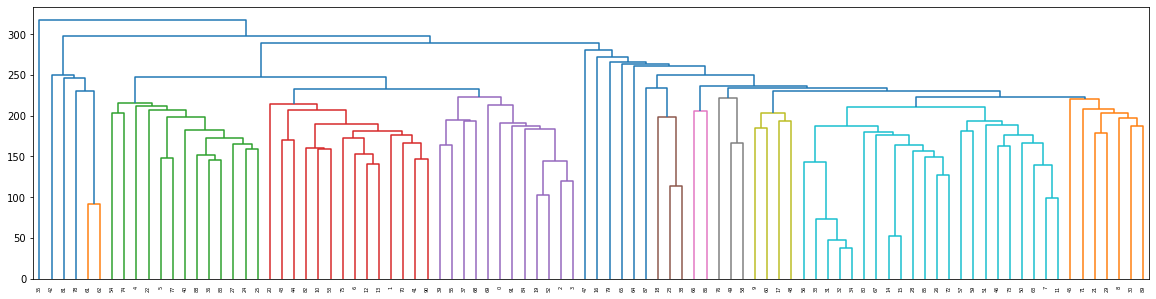

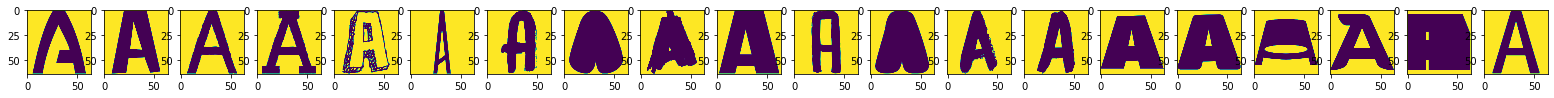

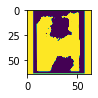

In [4]:
import pandas as pd
import cv2
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
conditional_index=[idx for idx,yy in enumerate(y) if 'big' in yy]
conditional_data=np.stack([data[idx] for idx in conditional_index])
conditional_data_flatt=(conditional_data.reshape(conditional_data.shape[0],-1))/255
#sift
print(conditional_data.shape)
Z = linkage(conditional_data_flatt, method='average')
print("ad")
pd.DataFrame(Z)
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(figsize=(20,5))
ax2 = dendrogram(Z)
fig2.show()
t=2
F = fcluster(Z, t = t, criterion = 'maxclust')
print(F)
for t in range(1,t+1):
    condition_data1=np.concatenate([conditional_data[idx] for idx in np.where(F==t)])/255
    print(condition_data1.shape)
    plt.figure(figsize=(30,100))
    size=condition_data1[:20].shape[0]
    for idx,data1 in enumerate(condition_data1[:20]):
        plt.subplot(1,22,idx+1)
        plt.imshow(data1[0])
# condition_data2=np.concatenate([conditional_data[idx] for idx in np.where(F==2)])/255
# print(condition_data1.shape)
# print(condition_data2.shape)
# plt.figure(figsize=(30,100))
# for idx,data1 in enumerate(condition_data1[:10]):
#     plt.subplot(1,12,idx+1)
#     plt.imshow(data1[0])
# plt.figure(figsize=(30,100))
# for idx,data2 in enumerate(condition_data2[:10]):
#     plt.subplot(1,12,idx+1)
#     plt.imshow(data2[0])

simple
643
*****学習終了********
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 

<ipython-input-3-1eb7605d61f1>:84: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(597, 52, 64, 64)


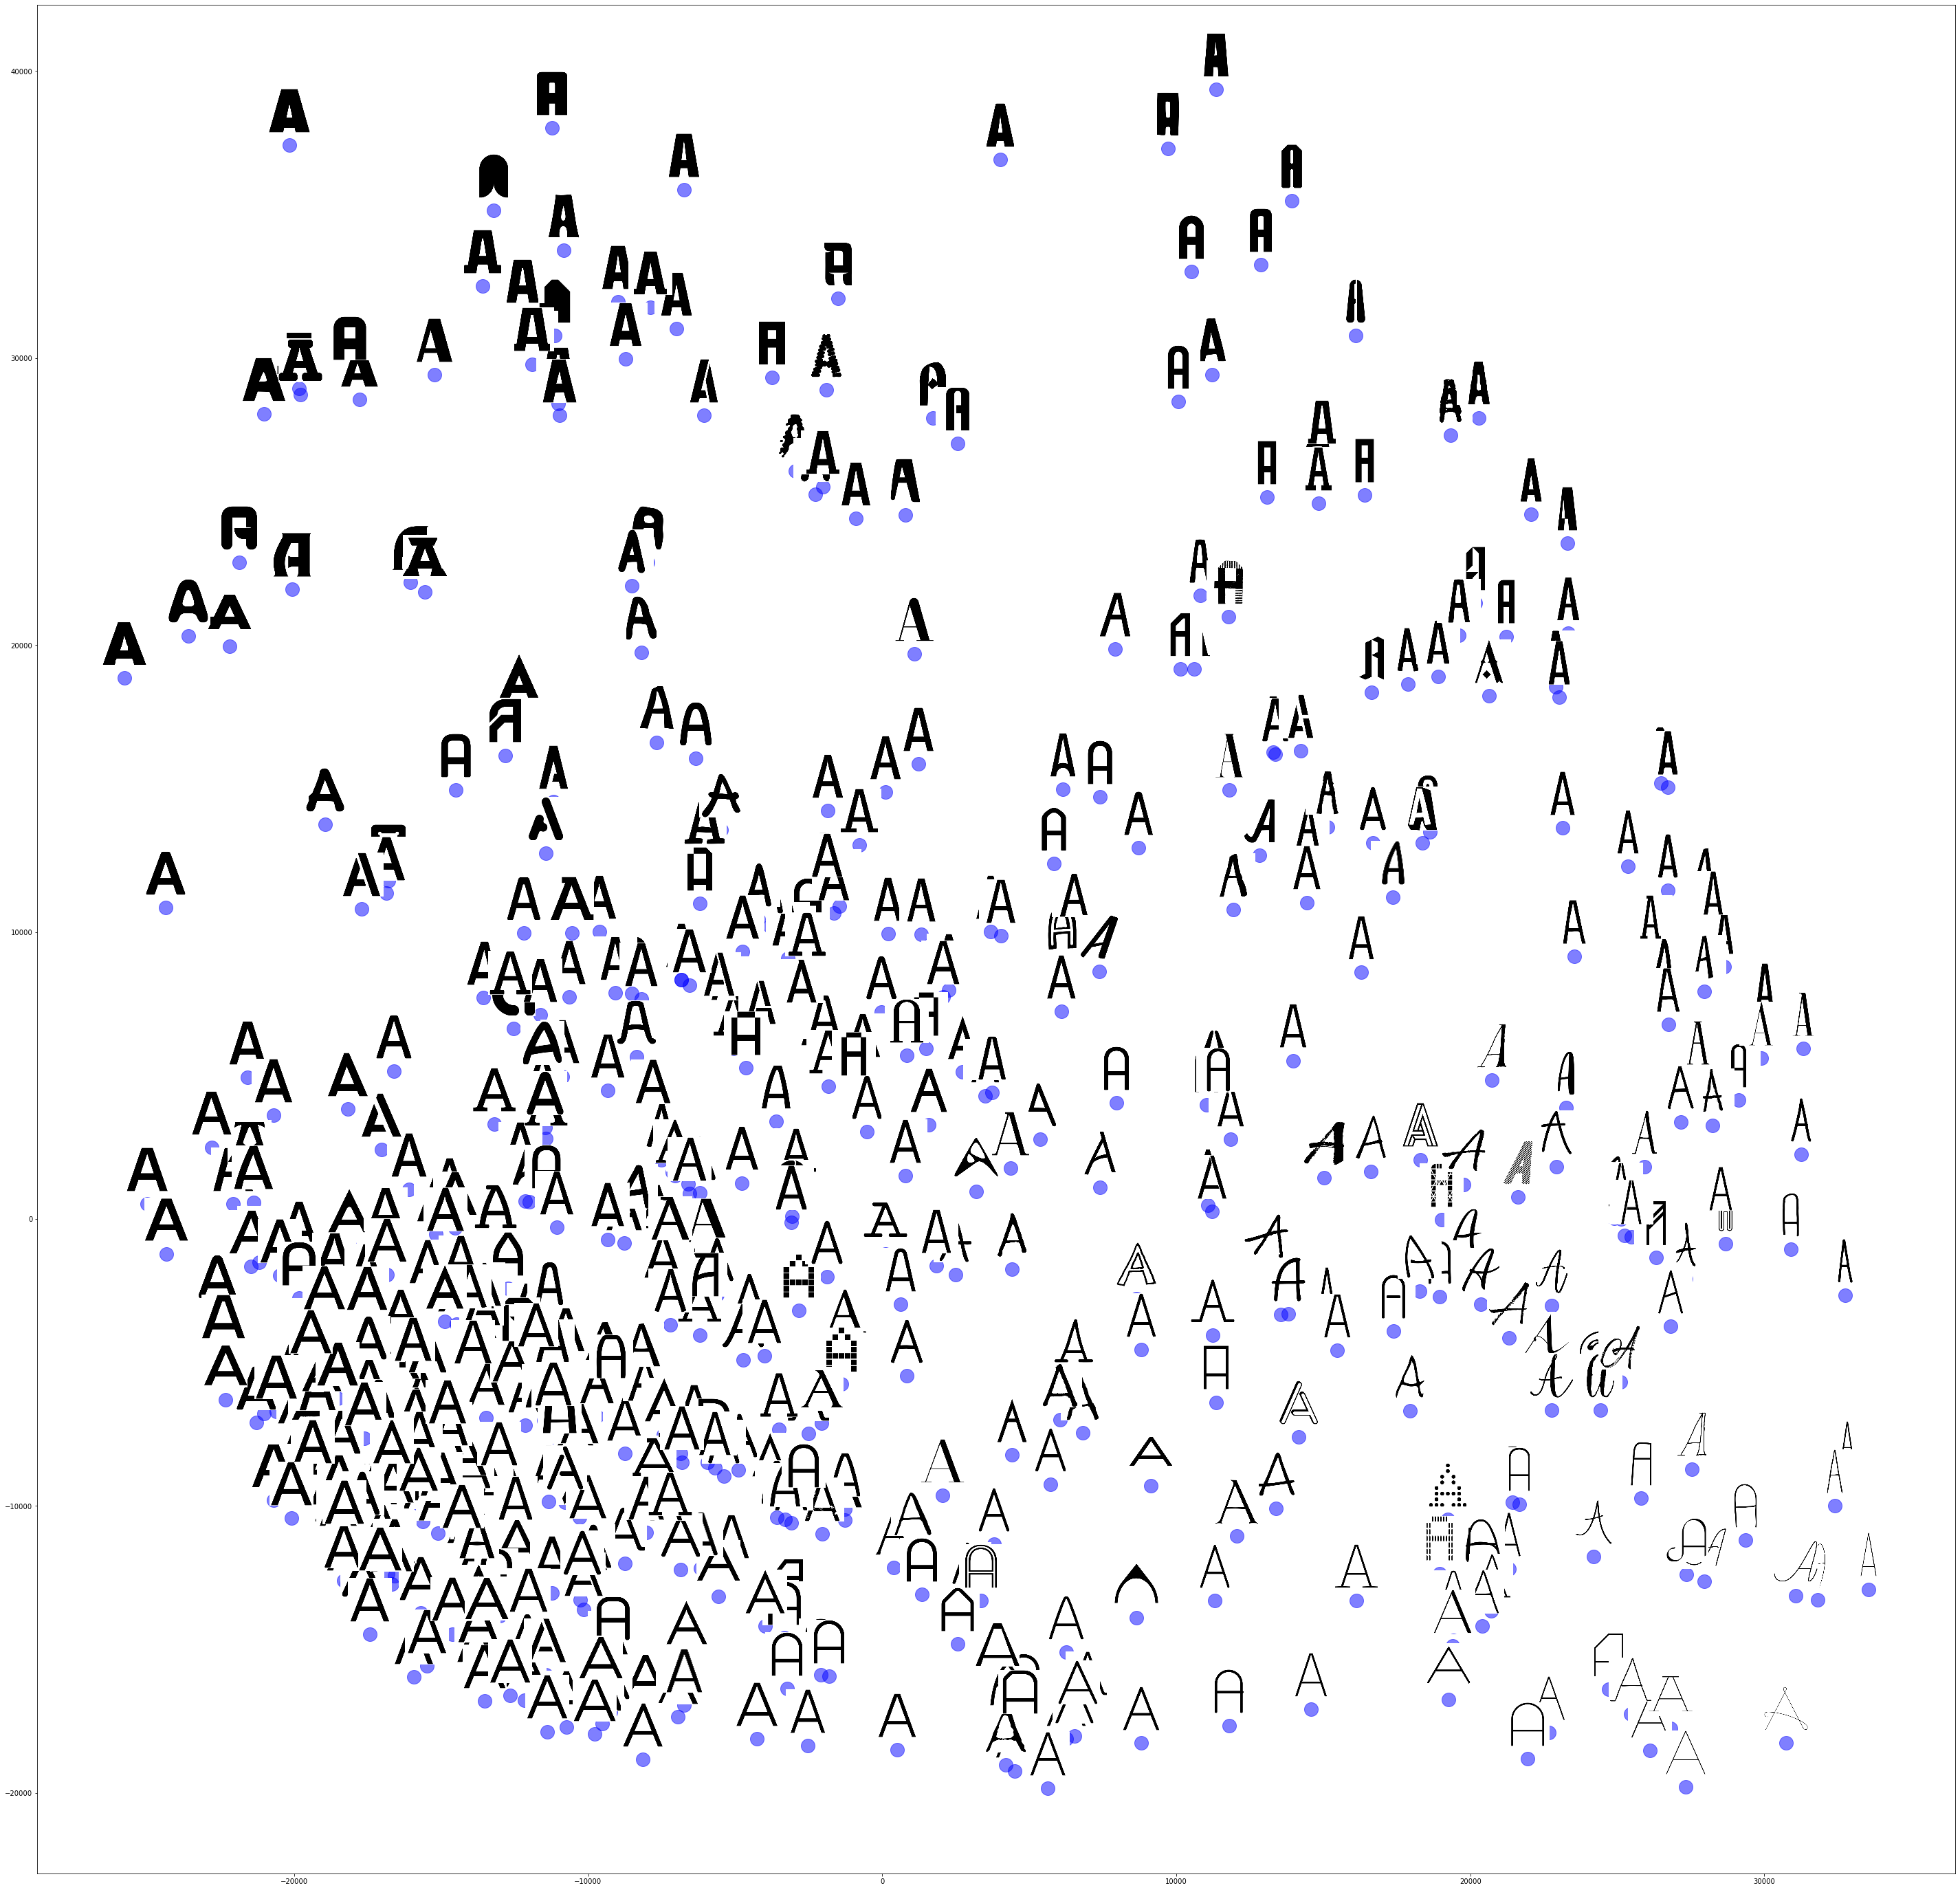

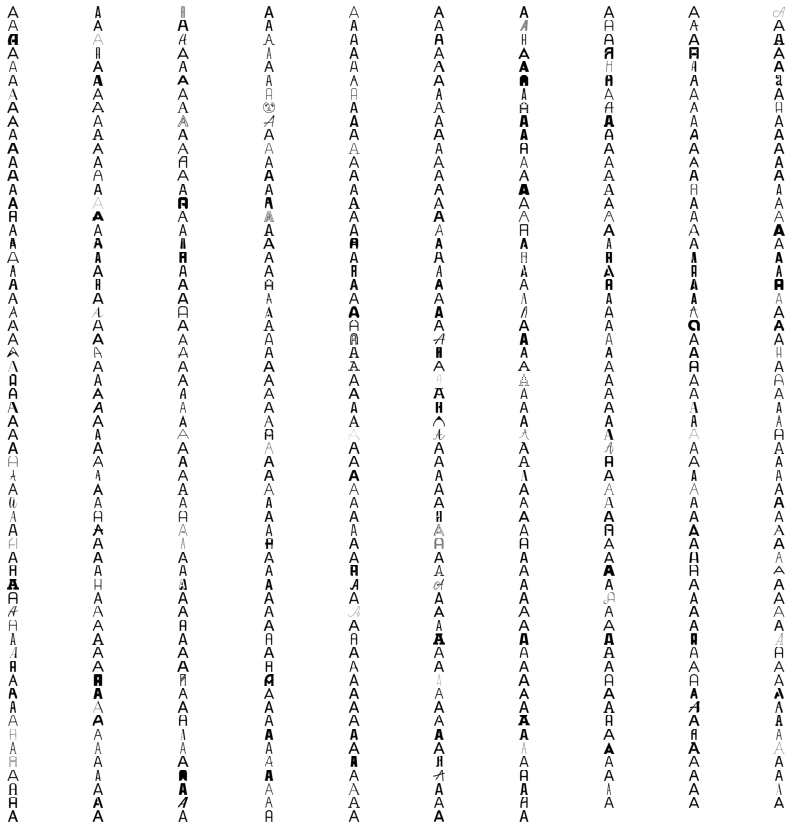

(46, 52, 64, 64)


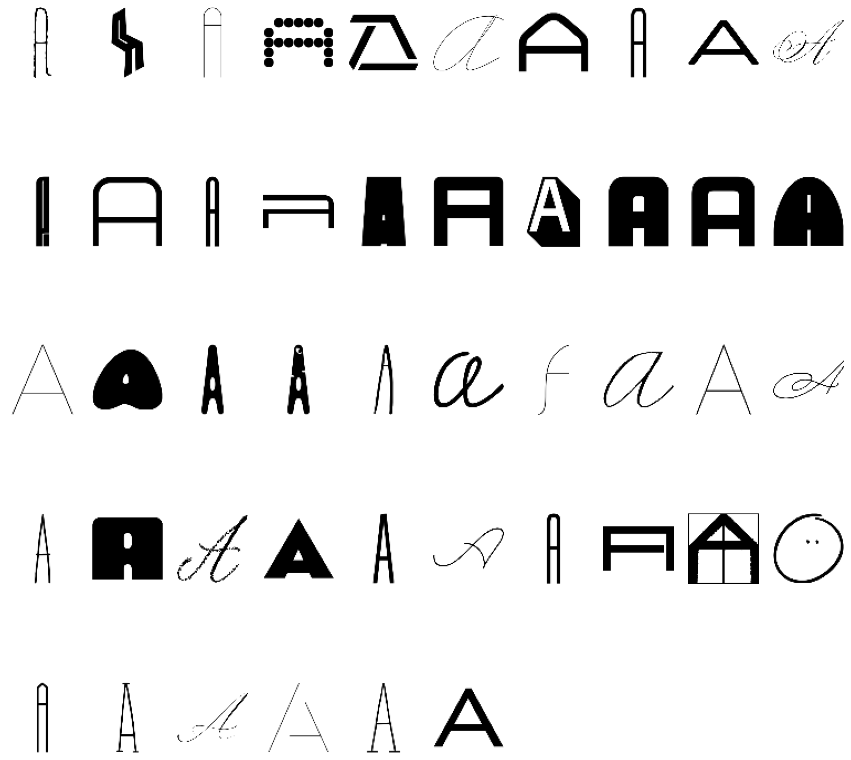

643


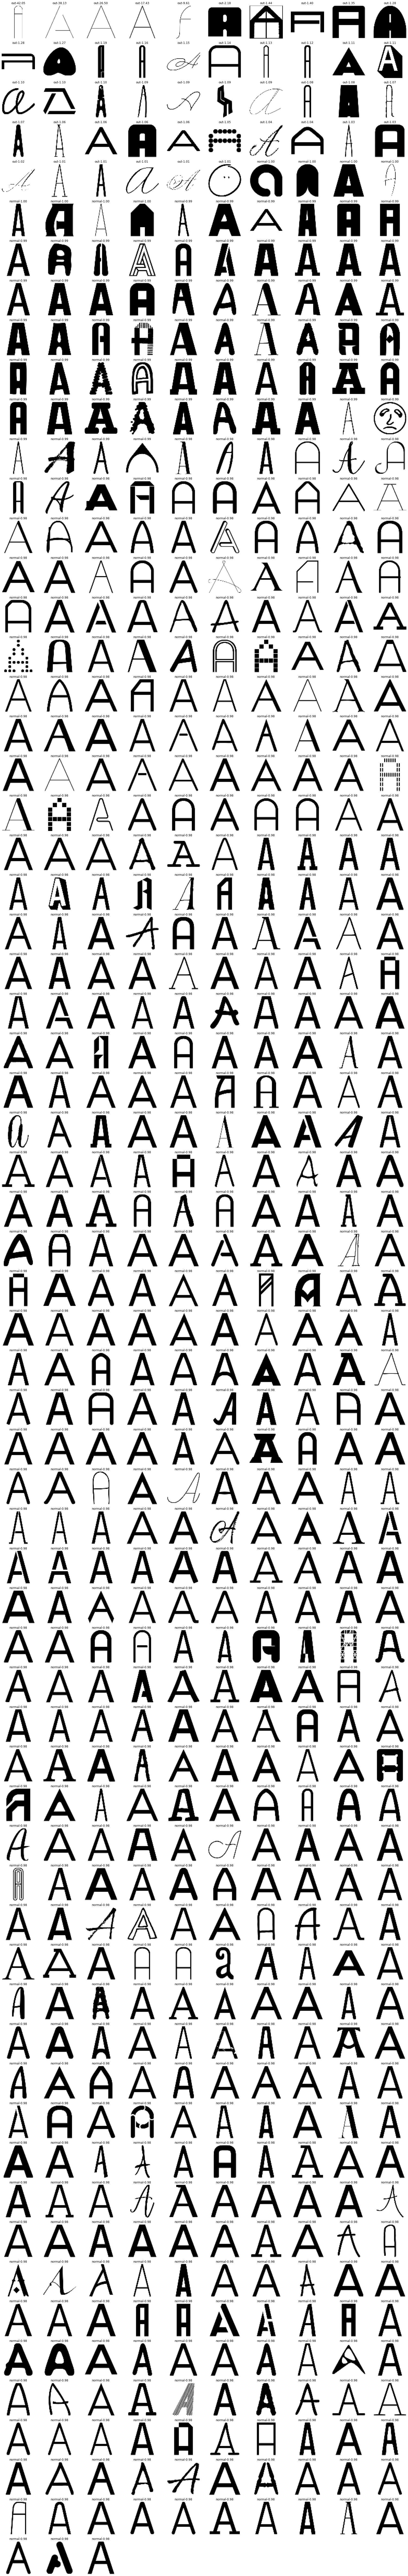

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
from mylib import pseudo_hamming,pickle_load,imscatter
from sklearn.manifold import TSNE
import os
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
def main(data):
#     a = random.sample(list(range(len(conditional_data_flatt))),50)
# #     print(a)
# #     f = np.array([0]*len(conditional_data_flatt),dtype = bool)
# #     f[a] =True
    data_flatt = data.reshape(data.shape[0],-1)
    # 訓練用に50個インデックスを選ぶ
    a = random.sample(list(range(len(conditional_data))), 27)
    f = np.array([0] * len(conditional_data), dtype=bool)
    f[a] = True
    # 訓練に使うデータを作成
    train_data = data_flatt[f]
    neigh =  LocalOutlierFactor(n_neighbors=27,
                                metric=pseudo_hamming,
                               novelty=True,
                               contamination=0.2)
    neigh.fit(train_data)
    print('*****学習終了********')
    prediction = neigh.predict(data_flatt)
    print(prediction)
    score = neigh.score_samples(data_flatt)
    print(score)
    print('*****tested******')
    # 距離をmax1にするデータ整形
#     mx = np.max(d)
#     d = d / mx
    return prediction, score

if __name__ == '__main__':
    #画像を格納しているパス
    paths = './Myfont/dataset/clean_fontimage/general'
    #並び替えのキーを定義
    sortsecond=lambda a : os.path.splitext(os.path.basename(a))[0]
    #すべての画像ファイル
    img_files = sorted(glob.glob('./Myfont/dataset/clean_fontimage/general/vector/*.npy'),key=sortsecond)
    #data = すべての画像データ
    data=np.stack([np.load(img_file) for img_file in img_files])
    #埋め込み可能なラベルリスト
    y = pickle_load(os.path.join(paths, 'impression_word_list.pickle'))
    # 埋め込みの値を格納しているやつ
    w2v_vocab = pickle_load(os.path.join(paths, 'w2v_vocab.pickle'))
    #印象語の指定
    token = 'simple'
    print(token)
    # 印象語が含まれるデータのインデックスを指定
    conditional_index=[idx for idx,yy in enumerate(y) if token in yy]
    print(len(conditional_index))
    # conditional_data:指定した印象語を含む全データ
    conditional_data=np.stack([data[idx] for idx in conditional_index])
    # conditional_data_flatt:指定した印象語を含む全データを平坦化
    conditional_data_flatt=(conditional_data.reshape(conditional_data.shape[0],-1))
    # conditional_data_２D:指定した印象語を含む全データを二次元
    conditional_data_2D = pca.fit_transform(conditional_data_flatt)
    # 可視化
    #fig=plt.figure(figsize = (50,50))
    #ax = fig.add_subplot(1,1,1)
    fig, ax = plt.subplots(figsize = (50,50))
    pred, score = main(conditional_data)
    t=[1,-1] #１は正常値， −１はハズレ値
    
    normal_data=np.concatenate([conditional_data[idx] for idx in np.where(pred==1)])/255
    out_data=np.concatenate([conditional_data[idx] for idx in np.where(pred==-1)])/255
    normal_data_2D = np.concatenate([conditional_data_2D[idx] for idx in np.where(pred==1)])
    out_data_2D = np.concatenate([conditional_data_2D[idx] for idx in np.where(pred==-1)])
    #ax.scatter(out_data_2D[:,0], out_data_2D[:,1], c = 'red')
    #imscatter(out_data_2D[:,0],out_data_2D[:,1]+1200,out_data[:,0,:,:],ax=ax,zoom=1.0,color='red')
    #plt.plot(out_data_2D[:,0],out_data_2D[:,1],'ko',alpha=0.5,c ='red',markersize = 20)
    #ax.scatter(normal_data_2D[:,0],normal_data_2D[:,1], c = 'blue')
    imscatter(normal_data_2D[:,0],normal_data_2D[:,1]+1200,normal_data[:,0,:,:],ax=ax,zoom=1.0,color='blue')
    plt.plot(normal_data_2D[:,0],normal_data_2D[:,1],'ko',alpha=0.5, c = 'blue', markersize = 20)
    fig.show()
    score_idx = list(np.argsort(np.array(score)))
    fig = plt.figure(figsize=(15,15))
    print(normal_data.shape)
    for idx,data in enumerate(normal_data):
        fig.add_subplot(-(-len(normal_data)//10),10,idx+1)
        plt.axis('off')
        plt.gray()
        plt.imshow(data[0])
    plt.show()
    fig = plt.figure(figsize=(15,15))
    print(out_data.shape)
    for idx,data in enumerate(out_data):
        fig.add_subplot(-(-len(out_data)//10),10,idx+1)
        plt.axis('off')
        plt.gray()
        plt.imshow(data[0])
    plt.show()
    score_idx = list(np.argsort(np.array(score)))
    print(len(score_idx))
    fig = plt.figure(figsize=(10*3,-(-len(score_idx)//10)*3))
    for idx,aa in enumerate(score_idx):
        fig.add_subplot(-(-len(score_idx)//10),10,idx+1)
        if pred[aa]==1:
            plt.title('normal'+'{:.2f}'.format(score[aa]))
        else:
            plt.title('out'+'{:.2f}'.format(score[aa]))
        plt.axis('off')
        plt.gray()
        plt.imshow(conditional_data[aa][0])
    plt.show()

In [3]:
import numpy as np
from mylib import pickle_load
import glob
import os
paths = './Myfont/dataset/clean_fontimage/general'
sortsecond=lambda a : os.path.splitext(os.path.basename(a))[0]
img_files = sorted(glob.glob(os.path.join(paths, 'vector/*.npy')),key=sortsecond)
data=np.stack([np.load(img_file) for img_file in img_files])
y = pickle_load(os.path.join(paths, 'impression_word_list.pickle'))
new_y = pickle_load(os.path.join(paths,'correct_impression_word_list.pickle'))
w2v_vocab =  pickle_load(os.path.join(paths, 'w2v_vocab.pickle'))

(1574, 2)
['cyrillic', 'height', 'advertise', 'large']


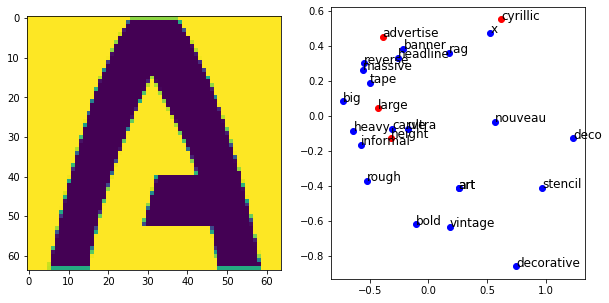

['legible', 'squarish', 'clear', 'book']


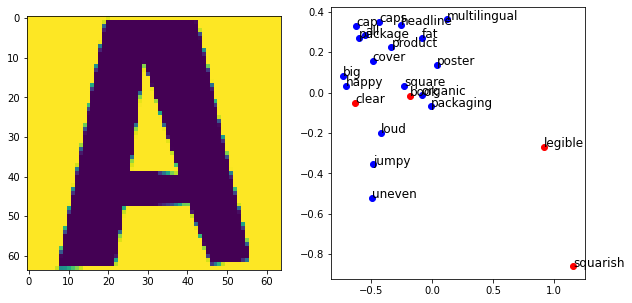

[]


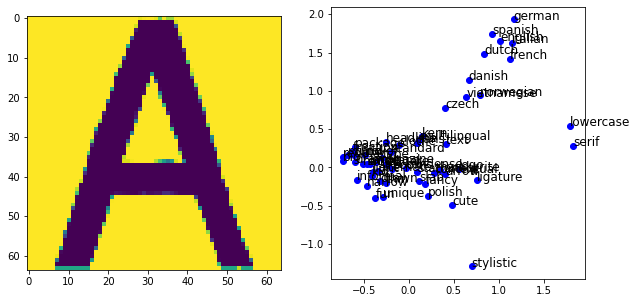

['text', 'standard', 'spanish', 'polish', 'german', 'fraction', 'logo', 'light']


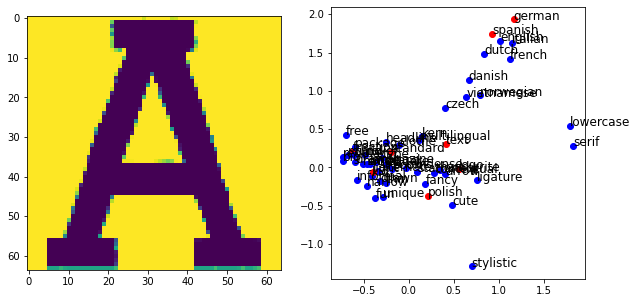

['fun', 'cartoon', 'magazine', 'headline', 'design', 'happy', 'comic', 'kid', 'fat', 'big', 'legible', 'multilingual', 'poster', 'grunge']


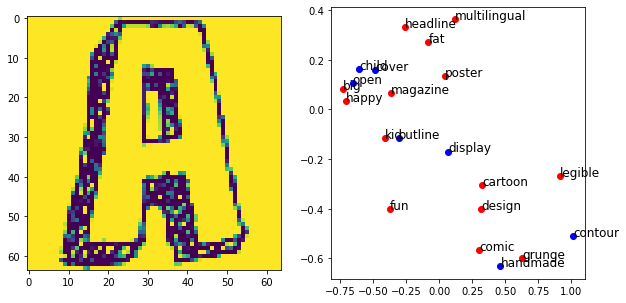

['stencil', 'big']


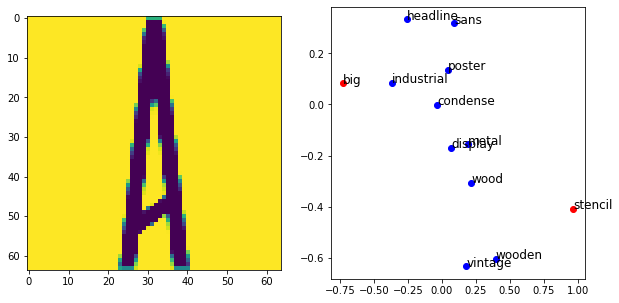

['hand', 'multilingual']


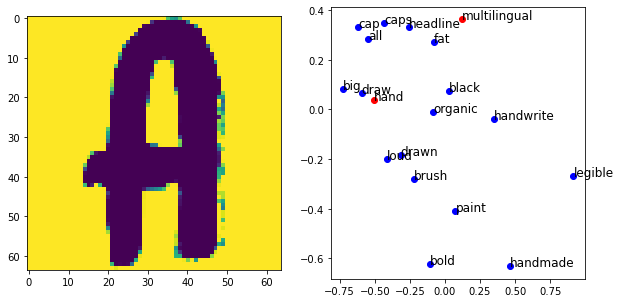

['trendy', 'funny', 'serif']


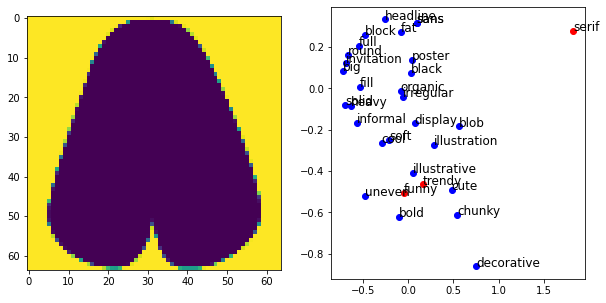

['legible', 'alternate']


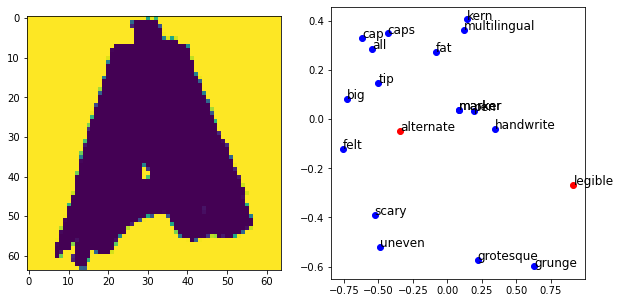

['news', 'magazine', 'grotesque', 'legible', 'book', 'curvy', 'newspaper', 'static']


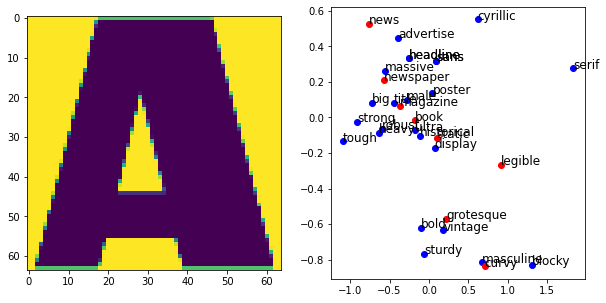

['hand', 'rough', 'book']


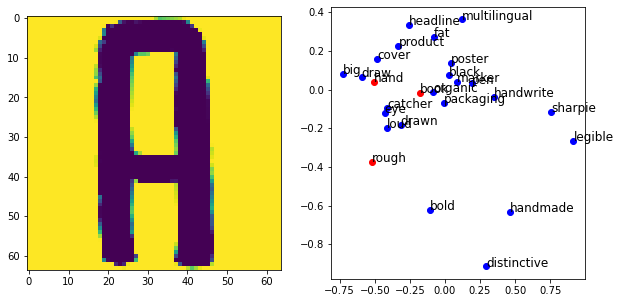

['trendy', 'hand', 'curvy', 'serif']


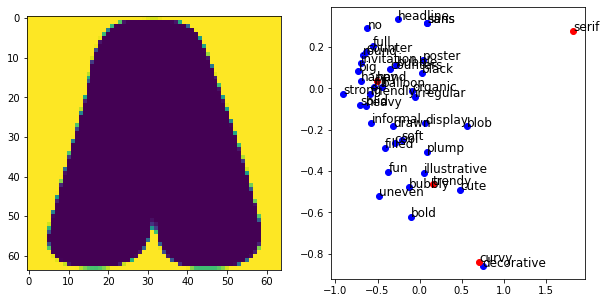

['clear']


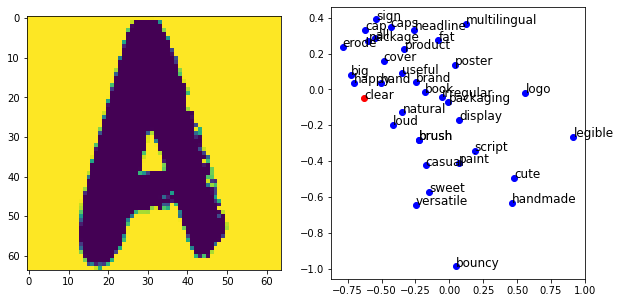

['clear']


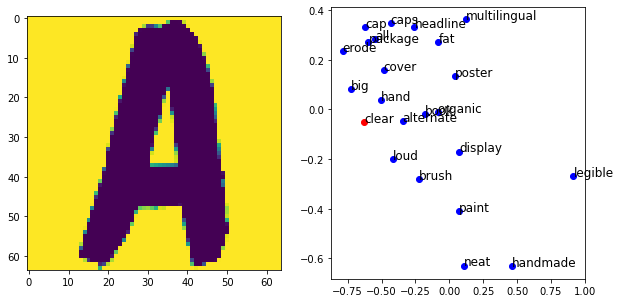

['magazine', 'modern', 'casual', 'clean', 'big', 'legible', 'book']


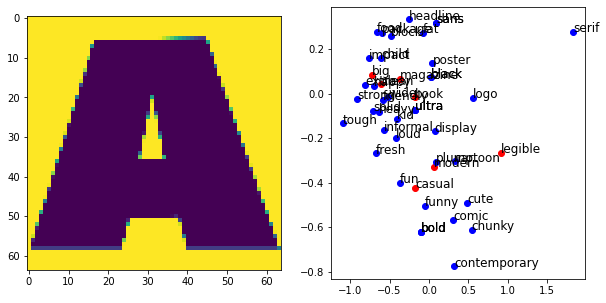

['magazine', 'modern', 'fresh', 'funny', 'casual', 'legible', 'book']


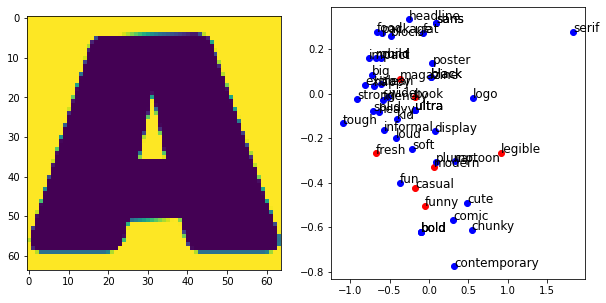

['display', 'modern', 'modernism', 'big', 'fat', 'century', 'heavy', 'vintage']


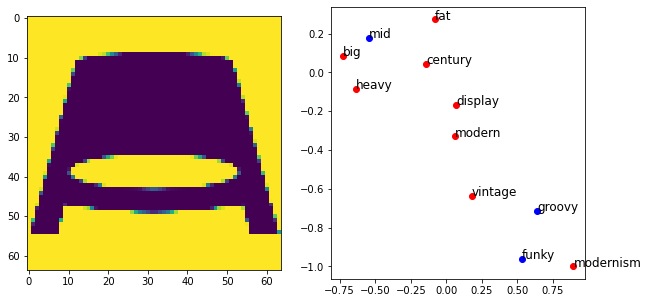

['geometric', 'advertise', 'happy', 'signage', 'fat', 'friendly', 'poster', 'serif']


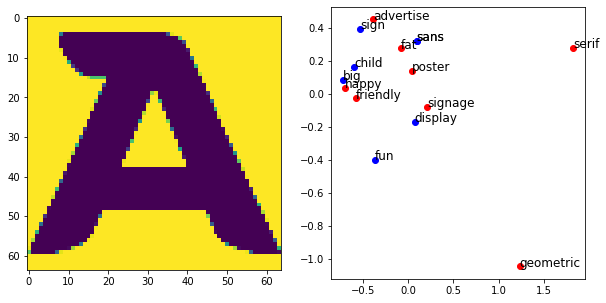

['geometric', 'edgy', 'informal', 'modular', 'outline', 'black', 'construct', 'headline', 'futuristic', 'big', 'heavy']


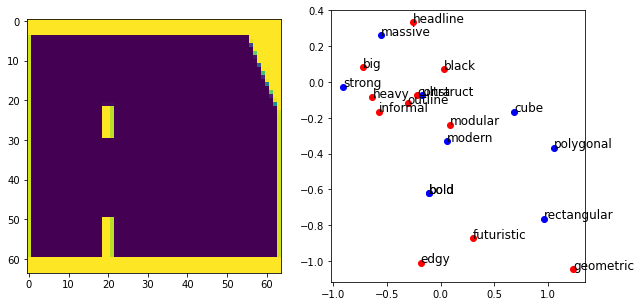

['workhorse', 'light']


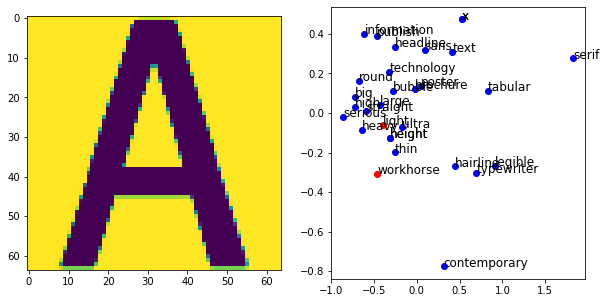

['all', 'ligature', 'caps', 'grotesque', 'multilingual', 'poster', 'useful']


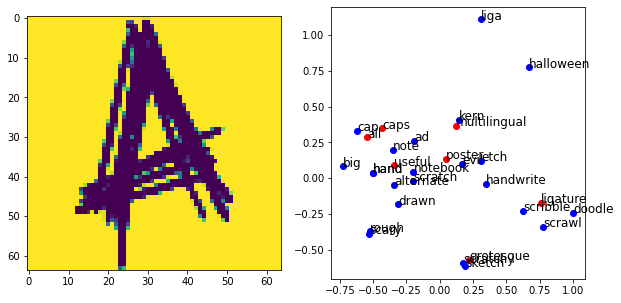

['case', 'logo', 'sans', 'signage', 'brand', 'serif', 'handwrite']


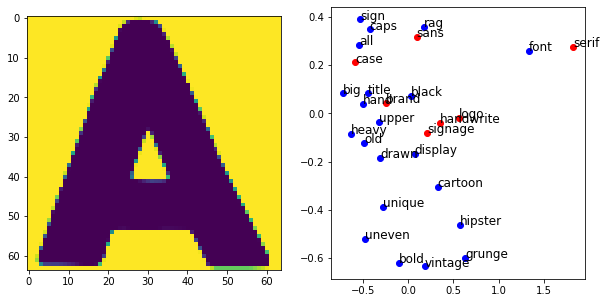

['legible', 'book', 'multilingual']


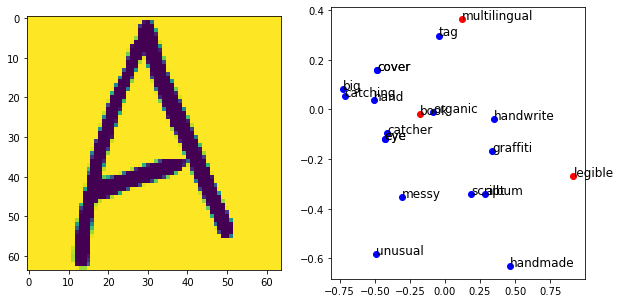

['german', 'small', 'arrow']


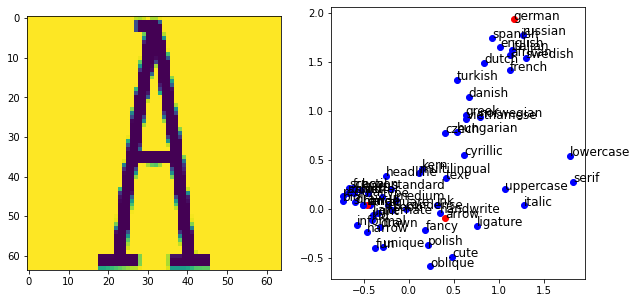

['narrow', 'ultra', 'standard', 'black', 'german', 'type', 'hand', 'monoline', 'condense', 'circle', 'czech']


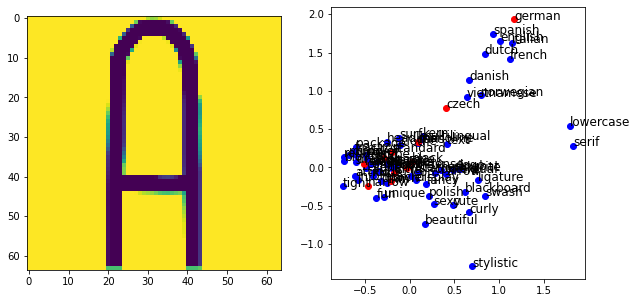

['serious', 'rationalist', 'noisy', 'slab', 'big']


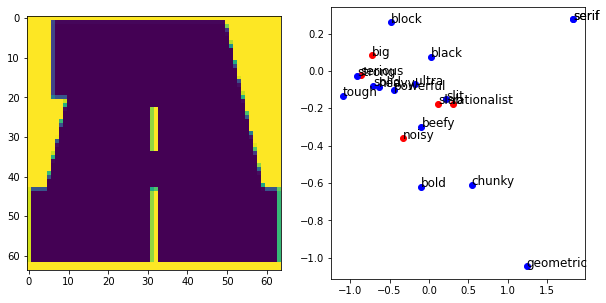

['basic', 'bold', 'logo']


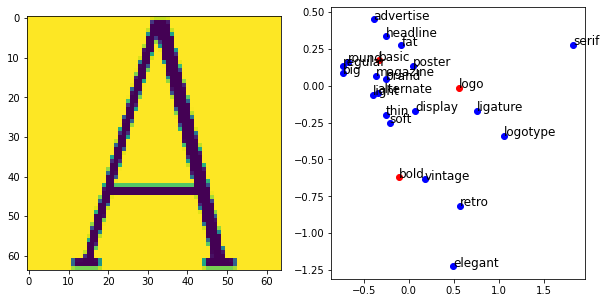

['display', 'ligature', 'headline', 'italics', 'true', 'simple', 'sans', 'big', 'fashionable', 'poster', 'serif']


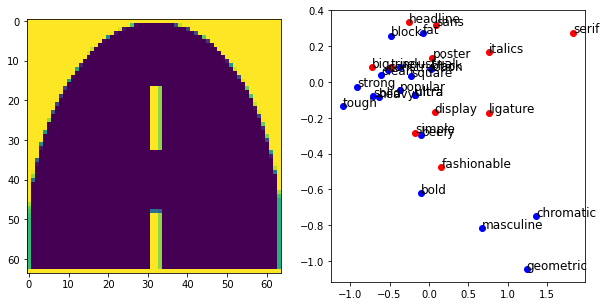

['round', 'serif', 'clean']


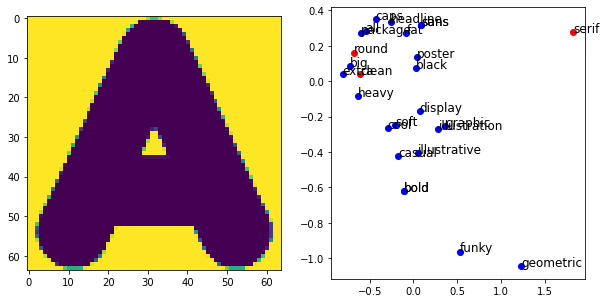

[]


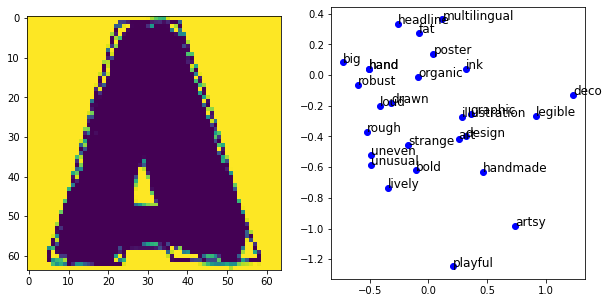

['texture', 'fashionable', 'display', 'construct', 'magazine', 'headline', 'ink', 'urban', 'fresh', 'arrow', 'hand', 'sans', 'editorial', 'graphic', 'stylish']


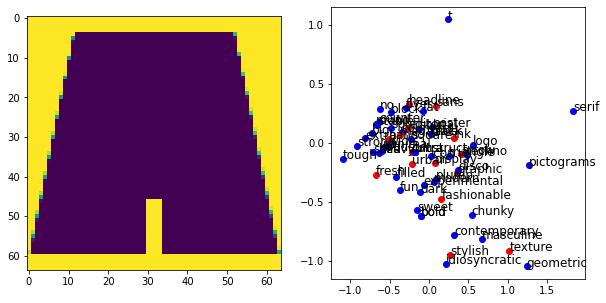

['fashionable', 'display', 'construct', 'magazine', 'headline', 'urban', 'fresh', 'arrow', 'hand', 'sans', 'editorial', 'graphic', 'stylish']


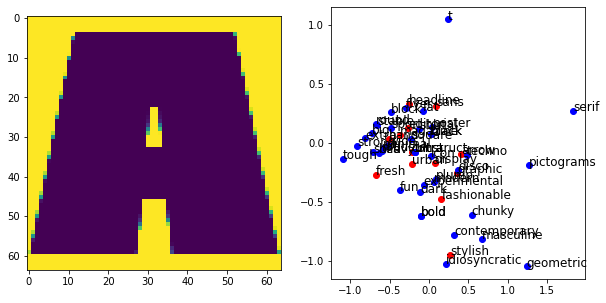

['stylish', 'sans', 'extra']


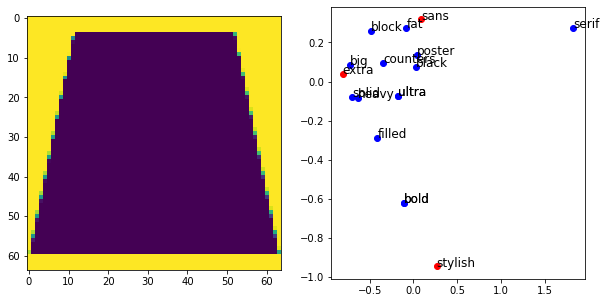

['graphic', 'sans', 'construct']


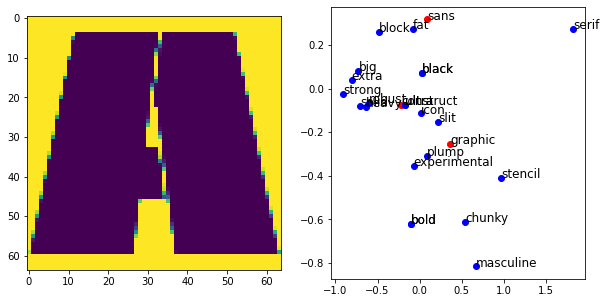

['magazine', 'headline', 'editorial', 'big', 'figures', 'lira']


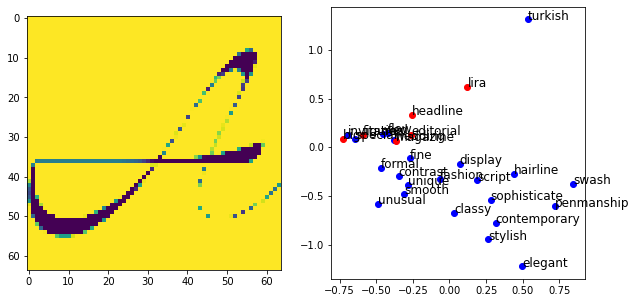

['elegant', 'product', 'display', 'package', 'sharp', 'classic', 'crisp', 'thin', 'design', 'capital', 'clean', 'big', 'legible', 'multilingual', 'stylish', 'poster', 'serif']


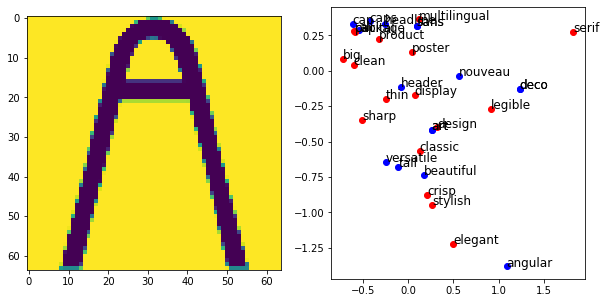

['black', 'square', 'title', 'retro', 'old', 'big', 'poster', 'heavy']


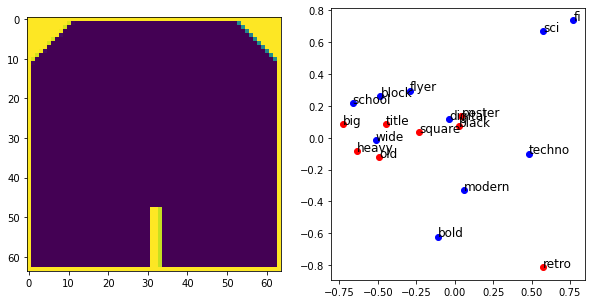

['legible', 'sharp', 'clean', 'versatile']


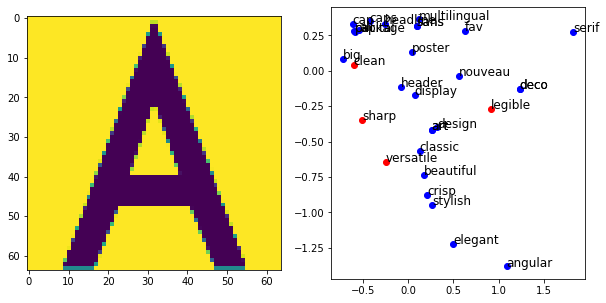

['clear', 'multilingual']


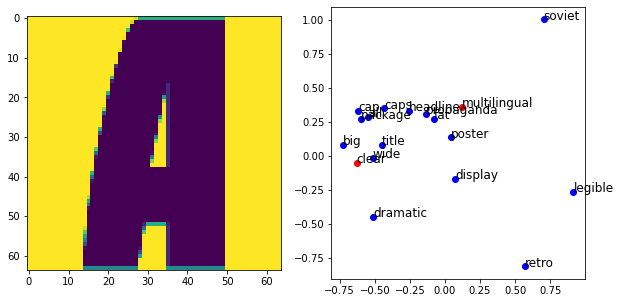

['x', 'cyrillic', 'informal', 'quirky', 'construction', 'free', 'advertise', 'strong', 'squarish', 'height', 'decorative', 'monoline', 'big', 'book', 'bold', 'poster', 'serif', 'banner']


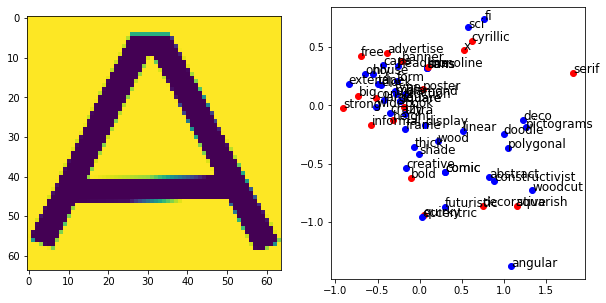

['display', 'dutch', 'beefy', 'strong', 'style', 'design', 'square', 'modernism', 'legible', 'multilingual', 'bold', 'contemporary', 'geometric']


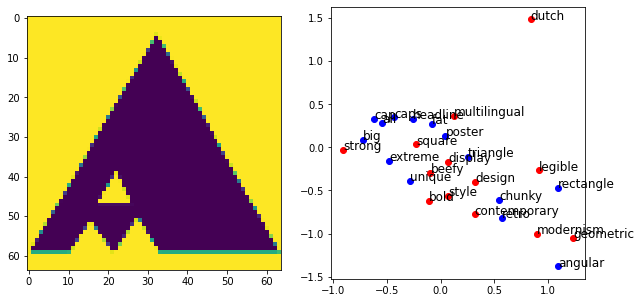

['playful', 'headline', 'hand', 'comic', 'sans', 'big', 'drawn']


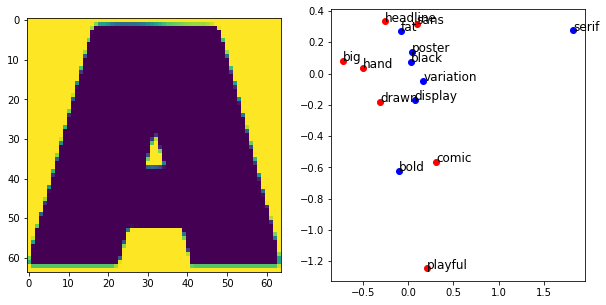

['alternate', 'mix', 'legible', 'contemporary', 'elegant', 'modular', 'ligature', 'magazine', 'editorial', 'book', 'logo', 'title', 'face', 'gothic', 'traditional', 'vintage', 'display', 'ornament', 'modern', 'big']


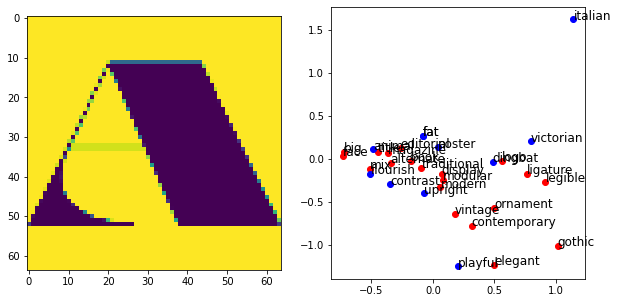

['classical', 'text', 'classic', 'read', 'open', 'readability', 'style', 'legibility', 'alternate', 'light', 'old', 'legible', 'book', 'brand']


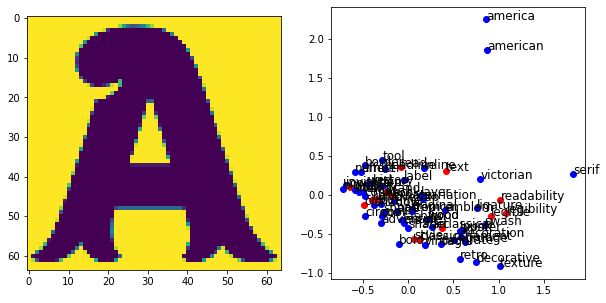

['elegant', 'head', 'contrast', 'neoclassical', 'curvy']


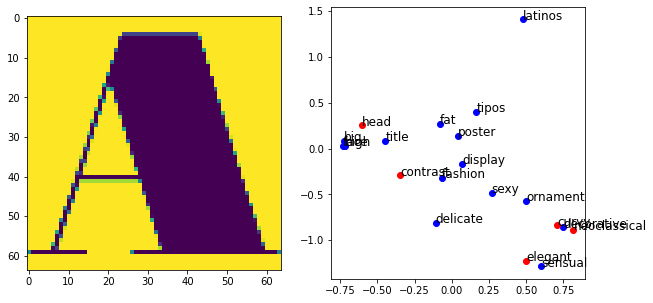

[]


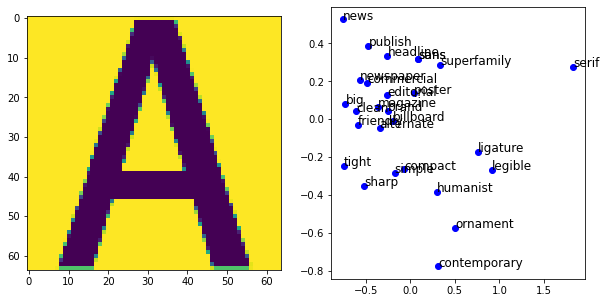

['robust', 'information', 'geometric', 'logo']


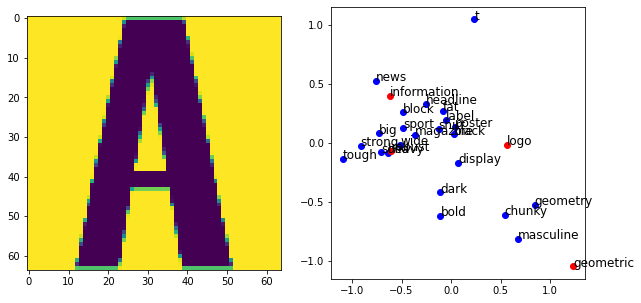

['multilingual', 'poster']


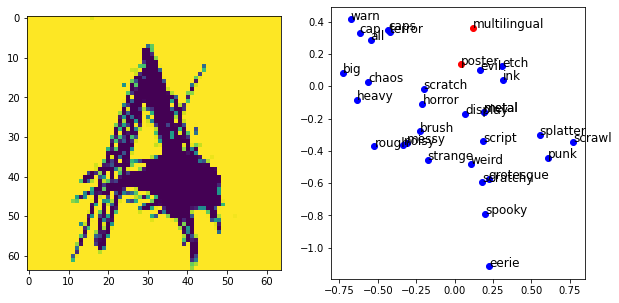

['sharp', 'magazine', 'clear', 'clean', 'legible']


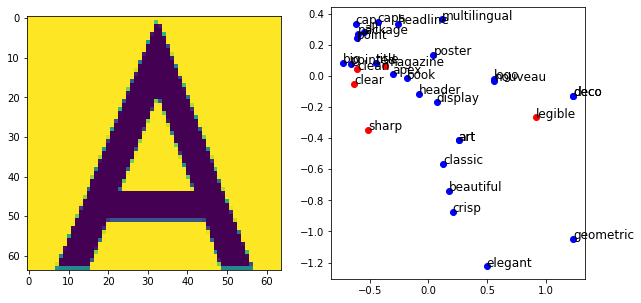

['display', 'magazine', 'daniel', 'alternate', 'hernandez', 'american', 'old', 'wild']


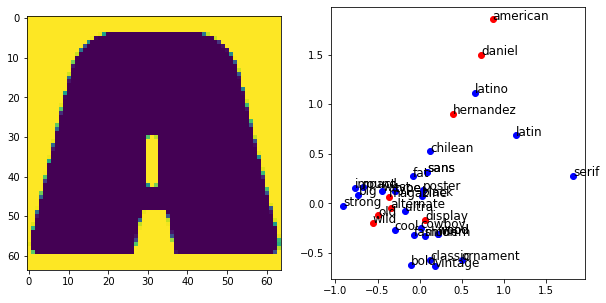

['daniel', 'sans', 'hernandez']


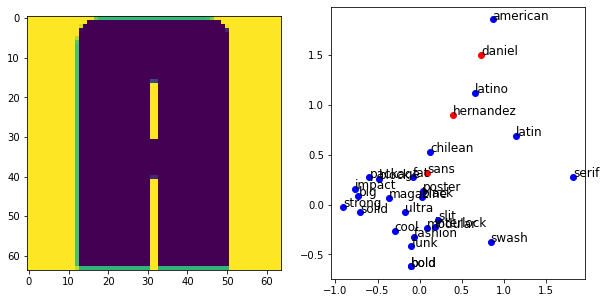

['elegant', 'curve', 'love', 'classy', 'magazine', 'model', 'modern', 'fine', 'roman', 'italic', 'subtle', 'cover']


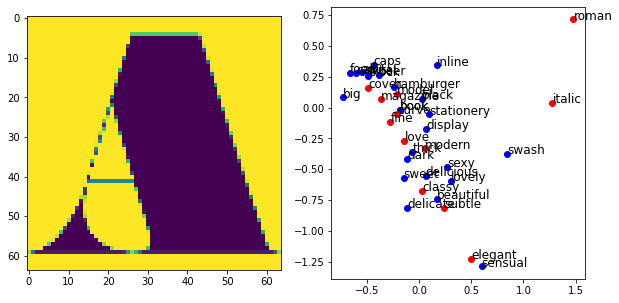

['sharp']


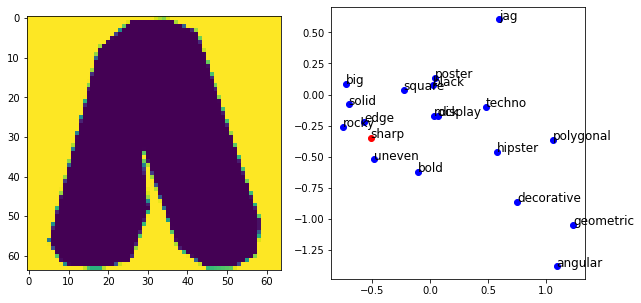

['magazine', 'hairline', 'style', 'functional', 'sans', 'serif']


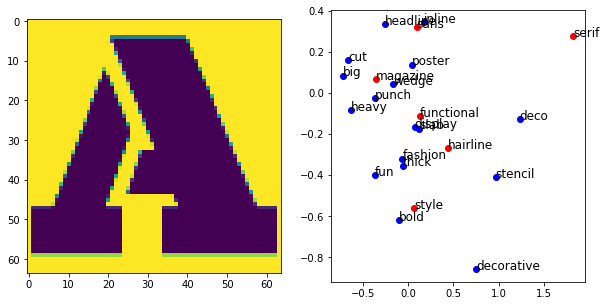

['rag', 'crafts', 'caps', 'grotesque', 'extend', 'poster', 'cyrillic', 'ultra', 'break', 'wood', 'french', 'magazine', 'advertise', 'headline', 'squarish', 'carve', 'fat', 'bold', 'masculine', 'small', 'damage', 'spanish', 'rocky', 'type', 'serif', 'solid', 'round', 'antique', 'chunky', 'big', 'strong', 'grunge', 'arts']


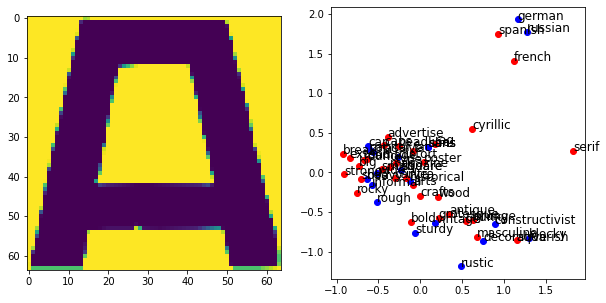

['linear', 'german', 'grotesque', 'caps', 'extend', 'poster', 'cyrillic', 'ultra', 'french', 'magazine', 'advertise', 'headline', 'squarish', 'fat', 'bold', 'small', 'masculine', 'spanish', 'logo', 'serif', 'chunky', 'big', 'strong']


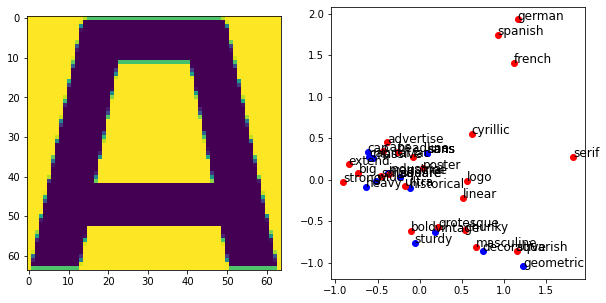

['legible', 'notch', 'sans']


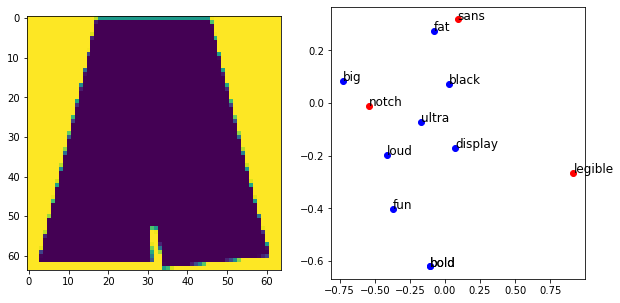

['blocky', 'angular', 'tough', 'triangle', 'only', 'caps', 'logotype', 'fi', 'constructivist', 'cap', 'geometric', 'ultra', 'solid', 'sci', 'construction', '3d', 'design', 'italic', 'stencil', 'futuristic', 'decorative', 'big', 'experimental', 'fat', 'art', 'abstract', 'block', 'heavy']


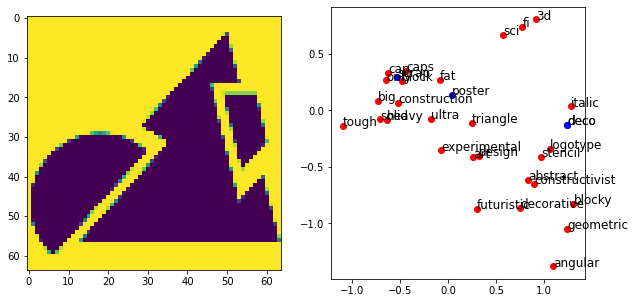

['fun', 'music', 'title', 'label', 'retro', 'brochure', 'handmade', 'cover', 'illustration', 'magazine', 'hand', 'funny', 'handprinted', 'kid', 'drawn', 'big', 'graphic', 'decorative', 'handwrite']


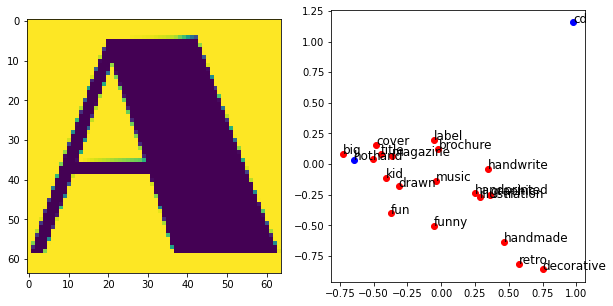

['display', 'fun', 'ultra', 'package', 'black', 'beefy', 'unique', 'headline', 'funny', 'face', 'american', 'big', 'vintage', 'poster', 'egyptian']


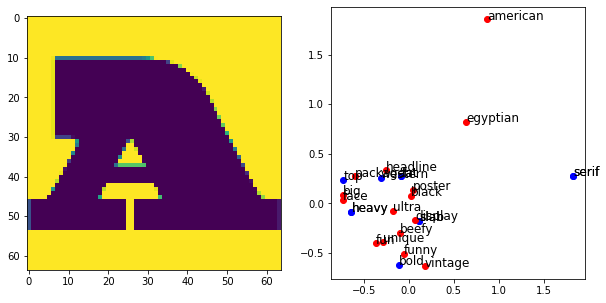

['ad', 'sharp', 'big']


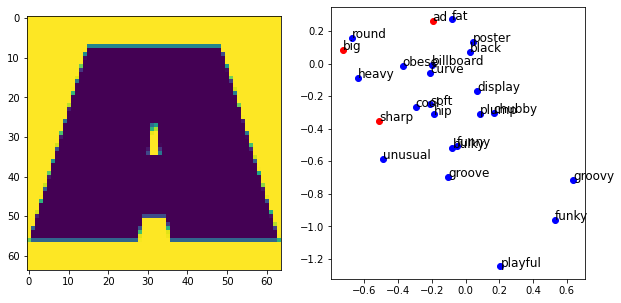

['elegant', 'package', 'sharp', 'angular', 'classic', 'round', 'caps', 'capital', 'clean', 'big', 'legible', 'poster', 'serif']


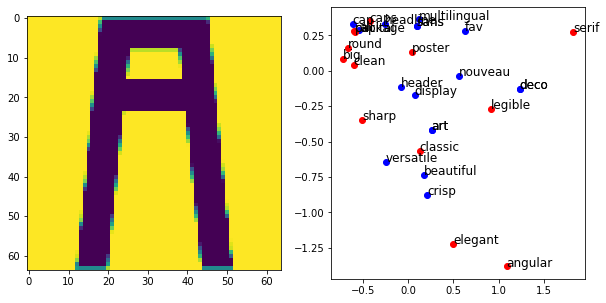

['marker', 'print', 'big', 'legible', 'poster']


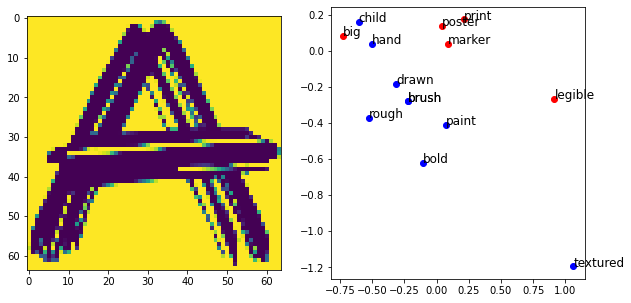

['app', 'stylish']


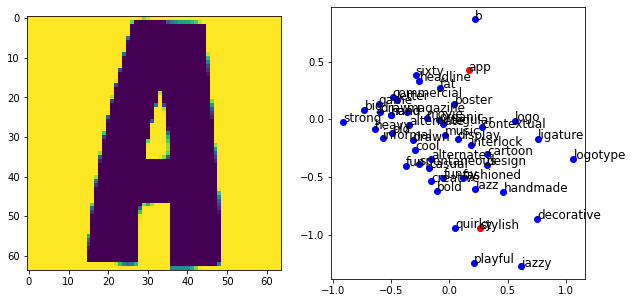

['stylistic', 'alternate', 'legible', 'multilingual', 'accent']


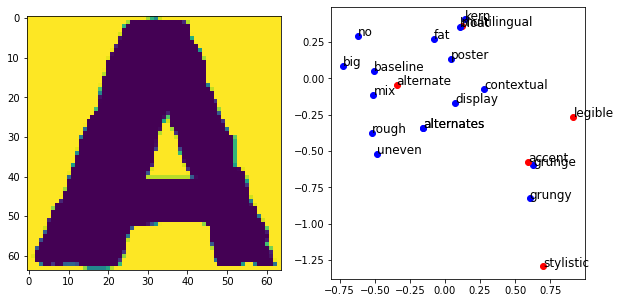

['display']


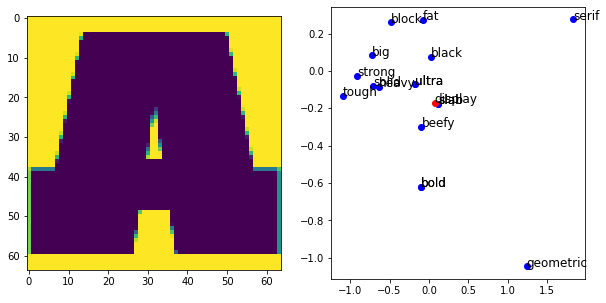

['big', 'angle']


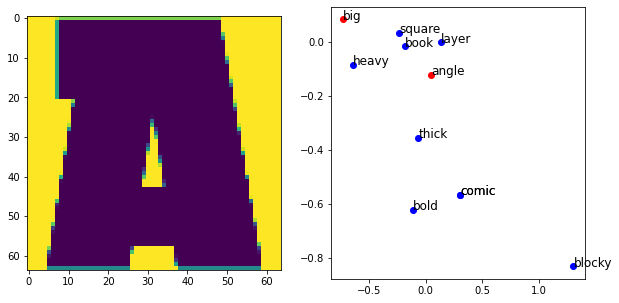

[]


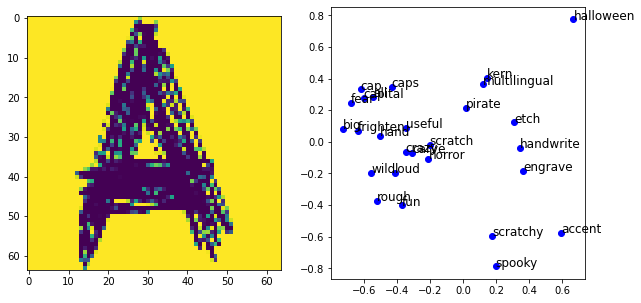

[]


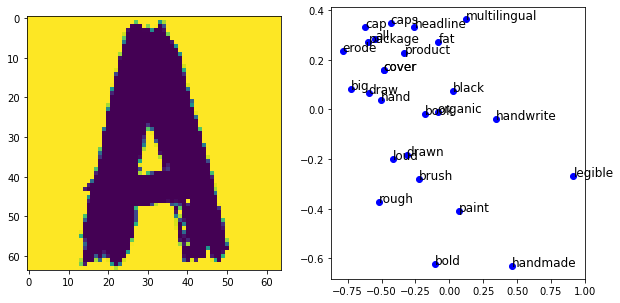

['cyrillic', 'french', 'spanish', 'triangle', 'german', 'design', 'logo', 'soviet', 'bold']


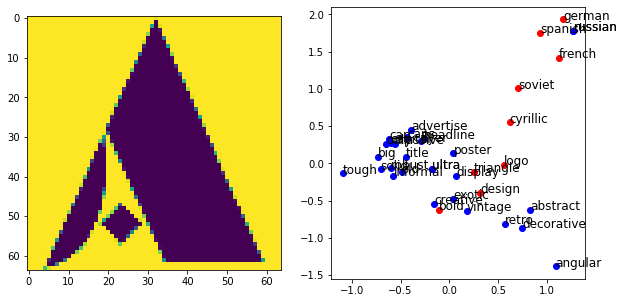

['creative', 'old', 'fat', 'cover', 'stylish', 'heavy']


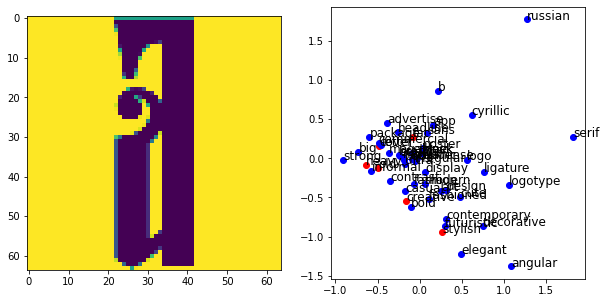

['wide', 'rag', 'angular', 'only', 'woodcut', 'flyer', 'caps', 'extend', 'russian', 'poster', 'loose', 'alien', 'cyrillic', 'metal', 'jazz', 'advertise', 'headline', 'squarish', 'polygonal', 'car', 'primitive', 'book', 'heavy', 'computer', 'deco', 'crazy', 'cap', 'massive', 'capital', 'display', 'sci', 'attitude', 'latin', 'organic', 'futuristic', 'fast', 'big', 'decorative']


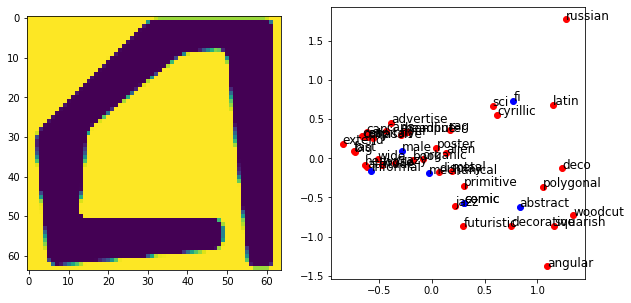

['latin', 'cyrillic', 'logo']


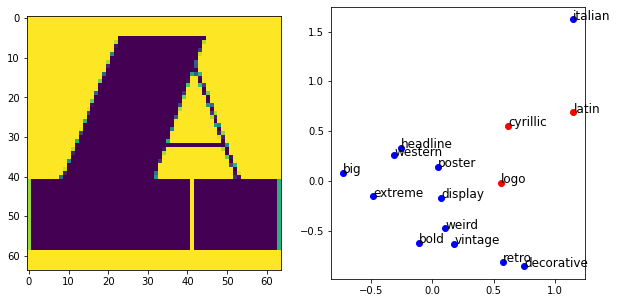

['serif', 'alternate', 'classic', 'modern']


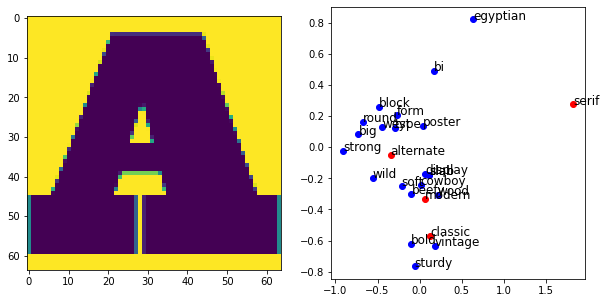

['logo', 'clear', 'legible', 'poster', 'geometric', 'ad', 'headline', 'modern', 'design', 'electronic', 'square', 'futuristic', 'big', 'fat', 'multilingual', 'stylish', 'brand']


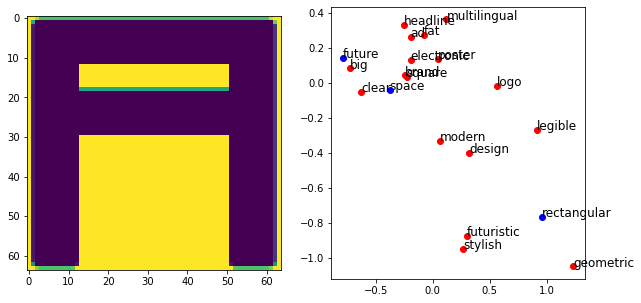

['contemporary']


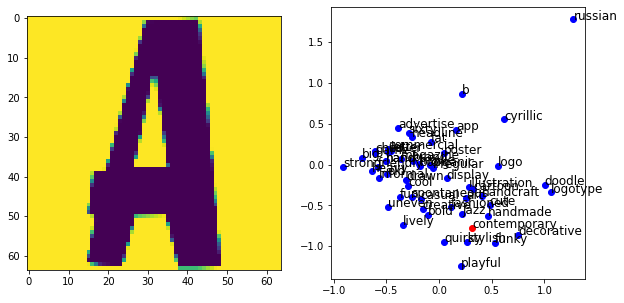

[]


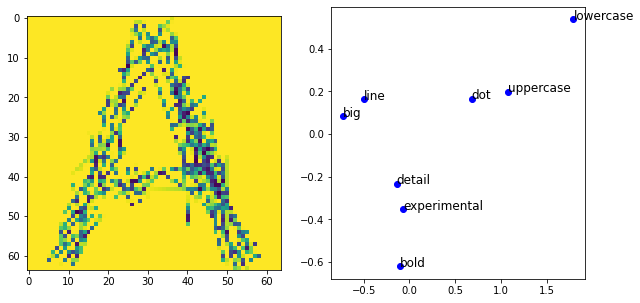

['italian', 'television', 'cut', 'luxury', 'readable', 'print', 'alternate', 'simple', 'legible', 'contemporary', 'medium', 'elegant', 'classic', 'identity', 'magazine', 'advertise', 'brand', 'editorial', 'book', 'stylish', 'professional', 'text', 'publish', 'logo', 'app', 'versatile', 'textured', 'serif', 'geometric', 'web', 'package', 'minimal', 'round', 'ebook', 'modern', 'style', 'pro', 'multilingual', 'apps']


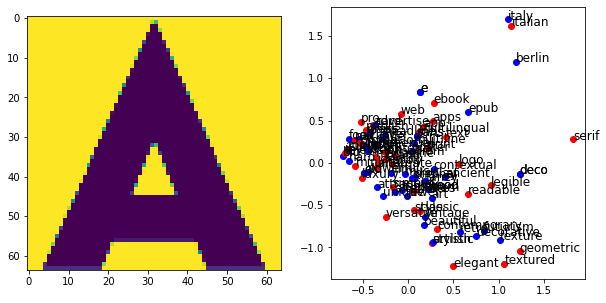

['texture', 'display', 'strike', 'plain', 'print', 'old', 'brochure', 'vintage', 'big', 'grunge']


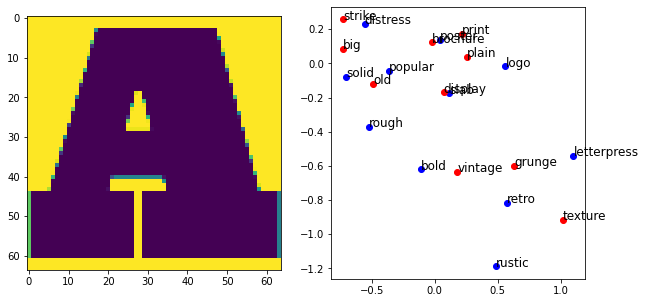

['fashionable', 'display', 'minimal', 'news', 'magazine', 'ink', 'logo', 'modern', 'square', 'hand', 'information', 'monoline', 'label', 'editorial', 'big', 'graphic', 'stylish']


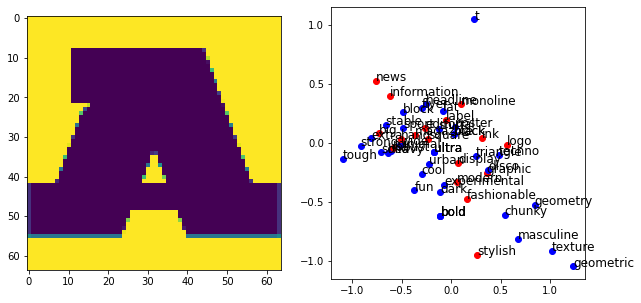

['urban', 'street', 'big']


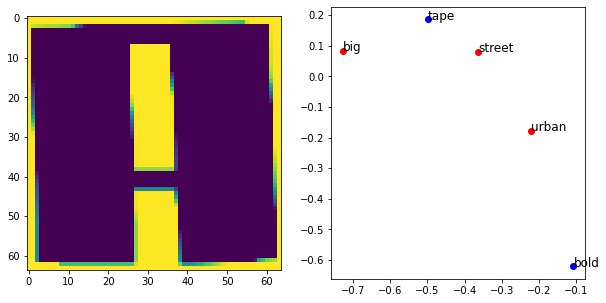

['x', 'black', 'headline', 'condense', 'big', 'editorial', 'bold', 'newspaper']


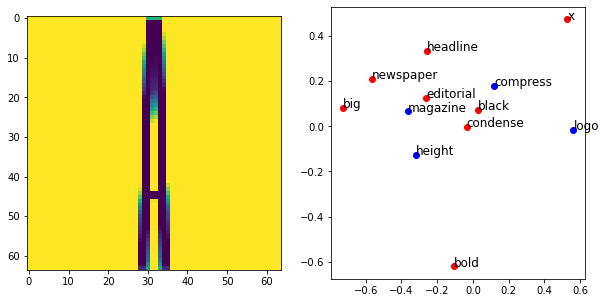

['cyrillic', 'caps', 'logo', 'futuristic', 'bold', 'brand', 'geometric']


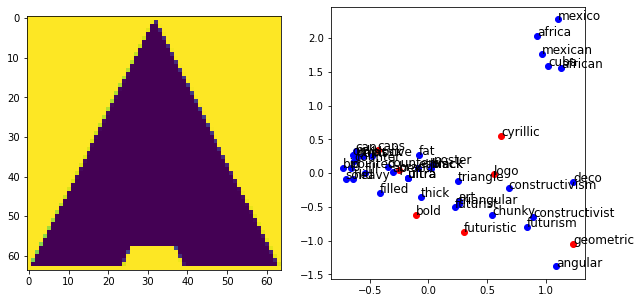

['clear', 'book', 'condense']


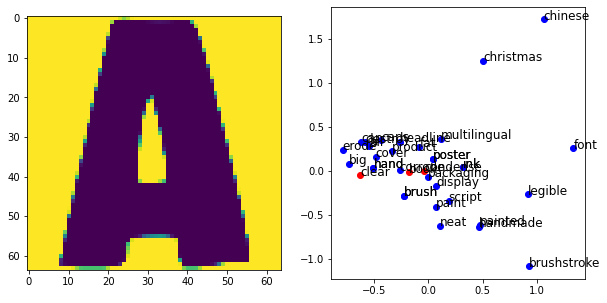

['round', 'advertise', 'serif', 'sans']


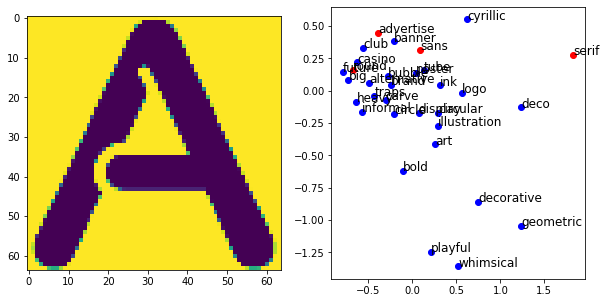

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca =PCA(n_components = 2)
w2v_vocab_2D = pca.fit_transform(np.array(list(w2v_vocab.values())))
w2v_vocab_keys = list(w2v_vocab.keys())
print(w2v_vocab_2D.shape)
out = list(set(y[1])-set(new_y[1]))
for i in range(len(y)):
    out = list(set(y[i])-set(new_y[i]))
    if 'big' in set(y[i]):
        print(out)
        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        ax1.imshow(data[i][0])
        for yy in y[i]:
            if yy in out:
                color = 'red'
            else:
                color = 'blue'
            plt.plot(w2v_vocab_2D[w2v_vocab_keys.index(yy)][0],w2v_vocab_2D[w2v_vocab_keys.index(yy)][1],"o",color = color)
            plt.annotate(yy, (w2v_vocab_2D[w2v_vocab_keys.index(yy)][0], w2v_vocab_2D[w2v_vocab_keys.index(yy)][1]), size=12)
        plt.show()

# 類似する単語を出力

In [5]:
import word2vec
model=word2vec.word2vec()
# 結果の確認2
# 関数most_similarを使って「世間」の類似単語を調べます 
ret = model.wv.most_similar(positive=['big']) 
for item in ret:
    print(item[0], item[1]) 

Embedding　OK


<ipython-input-5-bfa5d4ee4ee6>:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  ret = model.wv.most_similar(positive=['big'])


huge 0.7809855937957764
bigger 0.6842385530471802
biggest 0.6336529850959778
major 0.6057686805725098
gigantic 0.5822018384933472
HUGE 0.560417115688324
large 0.5561479330062866
humongous 0.5558628439903259
Huge 0.5524425506591797
great 0.5486619472503662


# word2vec

In [2]:
import torch
import torch.nn as nn
import tqdm
import torch.nn.functional as F
import word2vec
trained_embed_model = word2vec.word2vec()
word_vectors = trained_embed_model.wv
weights = word_vectors.syn0
ID = {key:idx for idx, key in tqdm.tqdm(enumerate(trained_embed_model.vocab.keys()))}
embed = nn.Embedding(weights.shape[0], weights.shape[1])
embed.weight = nn.Parameter(torch.from_numpy(weights))

<ipython-input-2-28a885b2e5c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  word_vectors = trained_embed_model.wv
<ipython-input-2-28a885b2e5c1>:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  weights = word_vectors.syn0
330570it [00:00, 3305687.39it/s]

Embedding　OK


3000000it [00:01, 2659245.61it/s]


In [42]:
embed(torch.tensor([0,1])).size()

torch.Size([2, 300])

In [5]:
import torch
import torch.nn as nn
linear = nn.Linear(1574, 1)
a =torch.ones(11, 300, 1574)
for _ in range(0):
    layer = nn.Sequential()
layer(a)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1., 

In [15]:
linear(a).size()

torch.Size([11, 300, 1])

In [10]:
import torch
label = [[1,2,3],[2],[1,2,12,18]]
from mylib import Multilabel_OneHot
label=Multilabel_OneHot(label,20)
weight = torch.ones(20, 300, dtype=torch.float).view(1,20,300).expand(3,-1,-1)
mask = (label >0).squeeze()

In [11]:
mask = mask.sum(0)>0
mask.size()

torch.Size([20])

In [29]:
weight.size()
D = torch.ones(64, 20, 300)
W = torch.randn(20,300)
torch.mul(D,W)
W.sum(1).size()

torch.Size([20])

In [6]:
path = '/home/matsuda/デスクトップ/ImpressionWordGAN/result/2021-01-12 13:15:21.201314/checkpoint_cpGAN/model_5'
a= torch.load(path)
a

{'epoch': 4,
 'G_model_state_dict': OrderedDict([('module.Emb_layer.W',
               tensor([[-0.7008],
                       [-0.4911],
                       [ 0.2470],
                       ...,
                       [ 0.7127],
                       [-0.4123],
                       [-1.0870]], device='cuda:0')),
              ('module.Emb_layer.embed.weight',
               tensor([[ 0.0267, -0.0908,  0.0278,  ..., -0.1167, -0.0294, -0.0708],
                       [ 0.0801,  0.1050,  0.0498,  ...,  0.0037,  0.0476, -0.0688],
                       [ 0.0618,  0.2578,  0.0037,  ...,  0.1118,  0.0728, -0.1748],
                       ...,
                       [ 0.0469,  0.0403,  0.0967,  ..., -0.0786, -0.1113,  0.1045],
                       [-0.0209, -0.0123,  0.0306,  ...,  0.0092,  0.0547,  0.0520],
                       [ 0.0410,  0.0181, -0.0146,  ..., -0.0195, -0.1338,  0.0605]],
                      device='cuda:0')),
              ('module.layer1.0.weight',
       

In [73]:
path = '/home/matsuda/デスクトップ/ImpressionWordGAN/result/single_ac_sn_ms/checkpoint_cWGAN/model_185'
a= torch.load(path)['D_model_state_dict']['module.fc_class.2.weight']
a.size()

torch.Size([1574, 1024])

In [208]:
mask[299999-1]

tensor(False)

In [266]:
weight = torch.ones(5, 1, dtype=torch.float)
x = d
torch.mul(x, weight)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [42]:
torch.FloatTensor([3,4,6])/torch.FloatTensor([2,3,4])

tensor([1.5000, 1.3333, 1.5000])

In [1]:
a = {'a':[1,2,3,3,4,5,6,7],'b':[9,8,7,6,7,8,9,5], 'c':[3,4,2]}

In [33]:
from mylib import Multilabel_OneHot
import torch
a = [[1,3,4,2],[4,6,8]]
d = Multilabel_OneHot([[3,4],[1,2]], 8)
d

tensor([[0.0000, 0.0000, 0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [2]:
d

tensor([[0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3333, 0.0000, 0.3333, 0.0000, 0.3333]])

In [10]:
weight = torch.zeros(2,10)
weight.scatter_(1,torch.tensor([[1],[3]]),1)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [11]:
weight

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [10]:
import torch.nn.functional as F
import torch
a = torch.FloatTensor([0,0,1]).view(1,-1)
b = torch.LongTensor([1,2])
F.cross_entropy(a,b)

ValueError: Expected input batch_size (1) to match target batch_size (2).

In [30]:
c = {a:2, b:3}

In [33]:
def f(*args):
    args = kwargs
    print(args)

In [15]:
import torch
a = torch.tensor([[1,2,3],[2,3,4]])
a.shape

torch.Size([2, 3])

In [32]:
noise = torch.normal(mean=0.5, std=0.2, size=(64, 1574, 300))
noise.sum(1)

tensor([[789.9854, 783.6436, 801.8551,  ..., 782.2533, 782.5259, 788.2596],
        [781.4697, 787.7072, 789.6351,  ..., 811.1286, 795.3524, 784.0998],
        [785.6035, 786.7532, 785.5691,  ..., 790.2970, 780.9851, 769.8616],
        ...,
        [783.1050, 784.5752, 771.2825,  ..., 784.3798, 785.5067, 778.3965],
        [782.0145, 784.6016, 798.4445,  ..., 784.5470, 792.8630, 776.7951],
        [780.9188, 776.6564, 785.3160,  ..., 791.4360, 791.6955, 782.6402]])

In [24]:
target_label = [[[1]] * 26 for i in range(4)]

In [18]:
target_label =['a','c','b']
ID={'a':3,'b':2, 'c':4}
sum([[[ID [key]]] * 26 for key in target_label], [])

[[3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2]]

In [1]:
import sympy as sp
import tqdm
ID = {'a':1, 'b':2, 'c':3,'d':4,'e':5}
list = [['a','b','c'],['d','e'], ['a'],['b','d'],['e'],['a','b','e']]

In [2]:
def fsum(x):
    output = 0
    for xx in x:
        output += globals()[xx]
    return output
def caliculate_weight(ID, list):
    val = ','.join(ID.keys())
    equall = []
    sp.var(val)
    for key in tqdm.tqdm(val[::2], total = len(val[::2])):
        output = 0
        for i in range(len(list)):
            if key in list[i]:
                output += globals()[key]/fsum(list[i])
            else:
                continue
        equall.append(sp.Eq(len(list)/len(ID), output))
    print(equall)
    result = sp.solve(equall, [globals()[key] for key in val[::2]])
    return result

In [3]:
result = caliculate_weight(ID, list)

100%|██████████| 5/5 [00:00<00:00, 73.77it/s]


[Eq(1.2, a/(a + b + e) + a/(a + b + c) + 1), Eq(1.2, b/(a + b + e) + b/(a + b + c) + b/(b + d)), Eq(1.2, c/(a + b + c)), Eq(1.2, d/(d + e) + d/(b + d)), Eq(1.2, e/(a + b + e) + e/(d + e) + 1)]


In [4]:
result

[(-8.95141229193979*e,
  9.19303366274019*e,
  -1.44972822480237*e,
  -2.65180453235072*e,
  e),
 (4.33021773563377*e,
  11.720876095054*e,
  -96.3065629841266*e,
  6.07450048528692*e,
  e),
 (e*(-0.586347976468102 + 1.26952707517997*I)*(e - 4.0*e*(-0.586347976468102 + 1.26952707517997*I))/(6.0*e + e*(-0.586347976468102 + 1.26952707517997*I)) - e*(9.0*e + 4.0*e*(-0.586347976468102 + 1.26952707517997*I))/(4.0*e - e*(-0.586347976468102 + 1.26952707517997*I)),
  -e*(-0.586347976468102 + 1.26952707517997*I)*(e - 4.0*e*(-0.586347976468102 + 1.26952707517997*I))/(6.0*e + e*(-0.586347976468102 + 1.26952707517997*I)),
  7.94130004132323e-8*e*(6077.48379941702 + 4637.70675789977*I)*(16754.378398374 + 4637.70675789977*I),
  e*(-0.586347976468102 + 1.26952707517997*I),
  e),
 (-e*(0.586347976468102 + 1.26952707517997*I)*(e + 4.0*e*(0.586347976468102 + 1.26952707517997*I))/(6.0*e - e*(0.586347976468102 + 1.26952707517997*I)) - e*(9.0*e - 4.0*e*(0.586347976468102 + 1.26952707517997*I))/(4.0*e + e*(

In [29]:
import torch
import torch.nn as nn
a = torch.tensor([[0.4,0.2,0.4],[0,0.5,0.6],[0.2,0.4,0.5]])
a[torch.tensor([0,2])]

tensor([[0.4000, 0.2000, 0.4000],
        [0.2000, 0.4000, 0.5000]])

In [9]:
f = nn.BCELoss()
fake = torch.zeros((2,3))

In [11]:
f(a, fake)

tensor(0.4757)

In [19]:
s = nn.Sigmoid()

In [20]:
s(a)

tensor([[0.5987, 0.5498, 0.5987],
        [0.5000, 0.6225, 0.6457]])

In [23]:
import word2vec
trained_embed_model = word2vec.word2vec()
word_vectors = trained_embed_model
weights = word_vectors.vectors

Embedding　OK


In [25]:
trained_embed_model.vocab
trained_embed_model['in'] == trained_embed_model.vectors[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
def get_z_random(batchSize, nz):
    z = torch.cuda.FloatTensor(batchSize, nz)
    z.copy_(torch.randn(batchSize, nz))
    return z

In [38]:
get_z_random(64, 100)

torch.Size([64, 100])

In [4]:
tensor([[2.5081e-05, 6.4189e-10, 2.3069e-08,  ..., 5.4220e-05, 3.4973e-08,
         1.6915e-05],
        [2.5448e-05, 5.9588e-07, 1.5384e-05,  ..., 1.2536e-03, 2.8240e-07,
         2.3677e-03],
        [8.4465e-06, 1.1086e-08, 4.6688e-08,  ..., 4.3511e-06, 7.0318e-05,
         1.9904e-04],
        ...,
        [2.9532e-04, 1.7784e-07, 7.0869e-09,  ..., 3.3027e-04, 3.0381e-07,
         4.8722e-05],
        [3.2938e-07, 6.3762e-15, 1.1771e-15,  ..., 8.9832e-07, 5.3911e-11,
         4.7082e-08],
        [6.2561e-03, 1.1774e-09, 7.9231e-10,  ..., 4.1496e-05, 1.1214e-08,
         2.2391e-06]], device='cuda:0')

RuntimeError: Could not infer dtype of ellipsis